# Fudan RPML Assignment1: Machine Learning Meets Fashion

![Machine Learning Meets Fashion](./img/ml_meets_fashion.jpg)

*Your name and Student ID: 陈朦伊, 19307110382

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet, and a .pdf report file) with your assignment submission.*

In this assignment, you will use what you have learned to tackle some pratical problems. Fashion MNIST dataset[1] is the MNIST-like fashion product database for image classification you will play with this time. It originally consists of a training set of 60000 examples and a test set of 10000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

To make this task more realistic (and harder:)), we selected 14600 labeled examples from the training set and did a little processing. You have to do this image classifictaion task with our new dataset. Besides, we provide you with the rest of examples (45400 examples) but with no labels, and you can consider how to use it in your experiment if needed.

You have to impletement several standard classification methods in the './fudanPRML' folder:
- K-nearest Neighbor (10 points)
- Decision Tree (15 points, optional)
- Softmax (10 points)
- SVM (15 points, optional)
- Neural Network (20 points)    

and then do your exploration (50 points).

You can only use some basic python libraries in your experiment like numpy, np(can not use the np.nn), matplotlib and so on. And please write down the version with them in the './requirements.txt' file.

Please MAKE SURE you followed a standard ML process, like do not use the test dataset for choosing hyperparameters.

## 1. Setup

In [1]:
# setup code
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
dataset_path = './dataset'

X_train = np.load(dataset_path + '/X_train.npy')
y_train = np.load(dataset_path + '/y_train.npy')
X_test = np.load(dataset_path + '/X_test.npy')
y_test = np.load(dataset_path + '/y_test.npy')

X_train_aug = np.load(dataset_path + '/X_train_aug.npy') # unlabeled data

In [3]:
label_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


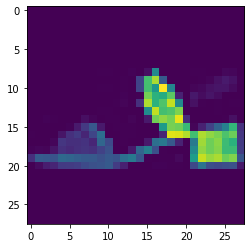

In [81]:
%matplotlib inline
from matplotlib import pyplot as plt

a = 230
plt.imshow(X_train[a].reshape(28,28))
print(y_train[a])

## 2. Exploratory Data Analysis (5 points)

Your may have to explore the dataset and do some analysis first.

In [5]:
print("训练集样本形状",X_train.shape)
print("训练集标签形状",y_train.shape)
print("测试集样本形状",X_test.shape)
print("测试集标签形状",y_test.shape)
print(y_train[:10])
print(X_train[:10])

训练集样本形状 (14600, 784)
训练集标签形状 (14600,)
测试集样本形状 (10000, 784)
测试集标签形状 (10000,)
[9 0 0 3 0 2 7 2 5 5]
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 70  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


## 3. Methodology

In [6]:
# Please open the corresponding file and complete it first
# The codebase is organized in a sklearn style
# you have to finish the 'fit' and 'predict' function and do your experiment in this .ipynb file
from fudanPRML.neighbors.k_nearest_neighbor import KNearestNeighbor
from fudanPRML.tree.decision_tree import DecisionTreeClassifier

from fudanPRML.linear_model.softmax import SoftmaxClassifier
from fudanPRML.svm.svc import SVMClassifier

from fudanPRML.neural_network.mlp import MLPClassifier

### K-nearest Neighbor (10 points)

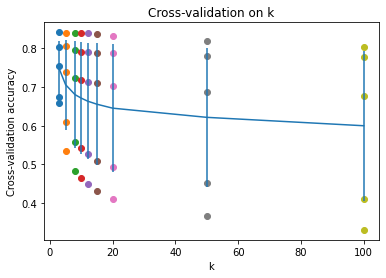

Got 4666 / 10000 correct => accuracy: 0.466600


In [8]:
model = KNearestNeighbor()
model.fit(X_train, y_train)

#cross validation
num_folds = 5
k_choices = [3,5,8,10,12,15,20,50,100]
X_train_folds = []
y_train_folds = []
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
k_to_accuracies = {}
for k in k_choices:
    k_to_accuracies[k] = []
    for i in range(num_folds):
        y_pred = model.predict(X_train_folds[i], k=k)
        num_correct = np.sum(y_pred == y_train_folds[i])
        accuracy = float(num_correct) / len(y_pred)
        k_to_accuracies[k].append(accuracy)
#plt results for k
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()
#use best k
best_k = k_choices[accuracies_mean.argmax()]
y_test_pred = model.predict(X_test, k=best_k)
num_correct = np.sum(y_test_pred == y_test)
accuracy = num_correct / y_test.shape[0]
print("Got %d / %d correct => accuracy: %f" % (num_correct, y_test.shape[0], accuracy))



### Decision Tree (15 points, optional)

In [5]:
clf = DecisionTreeClassifier(criterion = "info_gain" ,max_depth=100, max_features=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
num_correct = np.sum(y_pred == y_test)
accuracy = num_correct / y_test.shape[0]
print("Got %d / %d correct => accuracy: %f" % (num_correct, y_test.shape[0], accuracy))


Got 1012 / 10000 correct => accuracy: 0.101200


### Softmax (10 points)

In [5]:
#y->one-hot
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
#x->归一化
X_train.astype(np.float32)
X_test.astype(np.float32)
X_train = X_train / 255
X_test = X_test / 255
#split dev set
num_train = 12000
num_dev = X_train.shape[0] - num_train
X_dev = X_train[num_train:]
y_dev = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

In [6]:

def accuracy(preds, labels):
    assert len(preds) == len(labels)
    acc = None
    
    preds = np.cast(preds, 'float32')
    labels = np.cast(labels, 'float32')
    acc = np.sum(preds==labels) / len(preds)

    return acc

def plot(train_scores, dev_scores):
    plt.figure()
    plt.rcParams["font.family"]="SimHei"
    epochs = [i for i in range(len(train_scores))]
    plt.plot(epochs, train_scores, color='red', label="Train accuracy")
    plt.plot(epochs, dev_scores, color='blue', label="Dev accuracy")
    plt.ylabel("score")
    plt.legend(loc='upper left')
    plt.show()


def multi_cross_entropy(preds, labels):
    result = None
    
    labels = labels.astype(np.bool8)
    corrects = np.sum(np.multiply(preds, labels), axis=1)
    result = - np.sum(np.log(corrects)) / len(corrects)

    return result 

class GD():
    def __init__(self, model, learning_rate):
        self.model = model
        self.learning_rate = learning_rate

    def step(self):
        self.model.W -= self.learning_rate * self.model.dW

class Runner(object):
    def __init__(self, model, optimizer, metric, loss_fn):
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.metric = metric
        self.train_scores = []
        self.val_scores = []

    def train(self, train_set, dev_set, **kwargs):
        num_epochs = kwargs.get("num_epochs", 0)
        log_steps = kwargs.get("log_steps", 100)
        eval_steps = kwargs.get("eval_steps", 500)
        save_path = kwargs.get("save_path", "best_model.pdparams")
        global_step, best_score = 0, 0
        for epoch in range(num_epochs):
            x, y = train_set
            outputs = self.model(x)
            
            loss = self.loss_fn(outputs, y)
            score = None
            label_y = np.argmax(y, axis=1)
            label_output = np.argmax(outputs, axis=1)
            num_corrects = np.sum(label_output==label_y)
            score = num_corrects / len(label_y)
            self.train_scores.append(score)
            # 计算参数梯度
            self.model.backward(y)
            # 更新模型参数
            self.optimizer.step()

            if global_step % log_steps == 0:
                print(f"epoch: {epoch}, global_step: {global_step}, loss: {loss.item()}")
            
            if global_step % eval_steps == 0 or global_step == num_epochs:
                score = self.evaluate(dev_set)
                # 如果当前指标为最优指标，保存该模型
                if score > best_score:
                    self.save_model(save_path)
                    print(f"best accuracy performence has been updated: {best_score} --> {score}")
                    best_score = score
                    
            global_step += 1
        return self.train_scores, self.val_scores

    def evaluate(self, data_set, **kwargs):
        mode = kwargs.get("mode", 'train')
        x, y = data_set
        # 计算模型输出
        logits = self.model(x)
        # 计算损失函数
        loss = self.loss_fn(logits, y)
        
        score = None
        label_y = np.argmax(y, axis=1)
        label_output = np.argmax(logits, axis=1)
        num_corrects = np.sum(label_y==label_output)
        score = num_corrects / len(label_y)

        self.val_scores.append(score)
        if mode == 'test':
            print(f"[validation] score/loss: {score}/{loss}")
        return score

    def save_model(self, save_path):
        np.save(save_path, self.model.W)

    def load_model(self, model_path):
        self.model.W = np.load(model_path)

(12000, 784)
(2600, 784)
epoch: 0, global_step: 0, loss: 2.3025850929940455
best accuracy performence has been updated: 0 --> 0.9484615384615385
best accuracy performence has been updated: 0.9484615384615385 --> 0.9488461538461539
epoch: 300, global_step: 300, loss: 1.0724705424079197
epoch: 600, global_step: 600, loss: 1.0390063552370474
epoch: 900, global_step: 900, loss: 1.020905304925223
epoch: 1200, global_step: 1200, loss: 1.0081284959706802
epoch: 1500, global_step: 1500, loss: 0.9980890087006173
epoch: 1800, global_step: 1800, loss: 0.9897505091489105
epoch: 2100, global_step: 2100, loss: 0.9825901843566037
epoch: 2400, global_step: 2400, loss: 0.9763058912156756
epoch: 2700, global_step: 2700, loss: 0.9707103774276123


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


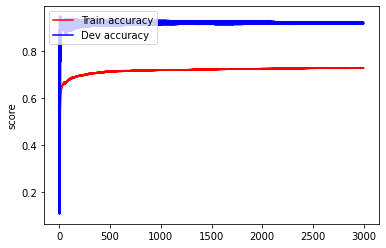

[validation] score/loss: 0.719/0.9970693294433628


0.719

In [7]:
input_dim = X_train.shape[1]
output_dim = 10
lr = 0.1

model = SoftmaxClassifier(input_dim=input_dim, output_dim=output_dim)
optimizer = GD(model=model, learning_rate=lr)
loss_fn = multi_cross_entropy
metric = accuracy

runner = Runner(model, optimizer, metric, loss_fn)
print(X_train.shape)
print(X_dev.shape)
train_scores, val_scores = runner.train([X_train, y_train], [X_dev, y_dev], num_epochs=3000, log_steps=300, eval_steps=1, save_path="best_model")


plot(train_scores, val_scores)
runner.evaluate([X_test, y_test], mode='test')

### SVM (15 points, optional)

### Neural Network (20 points)

In [7]:
#y->one-hot
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
#x->归一化
X_train.astype(np.float32)
X_test.astype(np.float32)
X_train = X_train / 255
X_test = X_test / 255
#split dev set
num_train = 12000
num_dev = X_train.shape[0] - num_train
X_dev = X_train[num_train:]
y_dev = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

In [88]:
def accuracy(preds, labels):
    assert len(preds) == len(labels)
    acc = None
    
    preds = np.cast(preds, 'float32')
    labels = np.cast(labels, 'float32')
    acc = np.sum(preds==labels) / len(preds)

    return acc


class CrossEntropyLoss(object):
    def __init__(self):
        self.predicts = None
        self.labels = None

    def __call__(self, inputs, label):
        return self.forward(inputs, label)

    def forward(self, inputs, label):
        res = None
        labels = label.astype(np.bool8)
        corrects = np.sum(np.multiply(inputs, labels), axis=1)
        res = - np.sum(np.log(corrects)) / len(corrects)
        self.predicts = inputs
        self.labels = label
        return res 
    
    def backward(self):
        # 反向传播
        grads = self.predicts - self.labels
        return grads


class SGD(object):
    def __init__(self, model, learning_rate):
        self.model = model
        self.learning_rate = learning_rate
    
    def step(self):
        for layer in self.model.layers:
            if layer.name == 'Linear':
                layer.params['W'] -= learning_rate * (layer.grads['W'])
                layer.params['b'] -= learning_rate * layer.grads['b']


epoch: 0, score: 0.08616666666666667, loss: 2.4293464724845197
epoch: 1, score: 0.3094166666666667, loss: 2.016661830459028
epoch: 2, score: 0.3094166666666667, loss: 1.9811772393431144
epoch: 3, score: 0.3094166666666667, loss: 1.9792516348898883
epoch: 4, score: 0.31075, loss: 1.979818898446351
epoch: 5, score: 0.31075, loss: 1.9802929759455261
epoch: 6, score: 0.25483333333333336, loss: 1.9793726632017465
epoch: 7, score: 0.3094166666666667, loss: 1.980177442966898
epoch: 8, score: 0.3094166666666667, loss: 1.9792256254605625
epoch: 9, score: 0.31075, loss: 1.9797276610870078


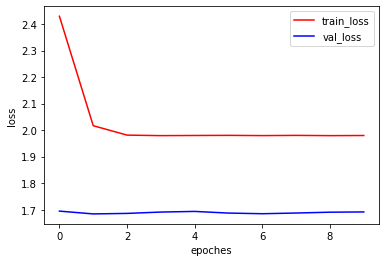

test score: 0.1


In [92]:
model = MLPClassifier(input_dim=X_train.shape[1], hidden_dim=100, output_dim=y_train.shape[1])
# 损失函数
loss_fn = CrossEntropyLoss()

# 优化器
learning_rate = 0.1
optimizer = SGD(model=model, learning_rate=learning_rate)

# 评估方法
metric = accuracy

epoch_num = 10
train_loss_list = []
val_loss_list = []
best_val_acc = -1
best_model = None

train_score = []
val_score = []

for i in range(epoch_num):
    x = X_train
    y = y_train
    # 前向计算
    pred = model(x)
    #print('pred:', pred[:2])
    # 计算损失
    loss = loss_fn(pred, y)
    train_loss_list.append(loss)
    # 反向计算
    loss_grad = loss_fn.backward()
    model.backward(loss_grad)

    # 参数更新
    optimizer.step()
    # 计算score
    label_y = np.argmax(y, axis=1)
    label_output = np.argmax(pred, axis=1)
    num_corrects = np.sum(label_output==label_y)
    score = num_corrects / len(label_y)
    train_score.append(score)
    if i % 1 == 0:
        print(f"epoch: {i}, score: {score}, loss: {loss.item()}")
    # 验证集前向计算与损失计算、保存最优模型
    
    val_pred = model(X_dev)
    val_loss = loss_fn(val_pred, y_dev)
    val_loss_list.append(val_loss)
    
    label_y = np.argmax(y_dev, axis=1)
    label_output = np.argmax(val_pred, axis=1)
    num_corrects = np.sum(label_output==label_y)
    score = num_corrects / len(label_y)
    val_score.append(score)
    if best_val_acc < score:
        best_val_acc = score
        best_model = model
    

# 打印训练集和验证集的损失
plt.figure()
plt.plot(range(epoch_num),train_loss_list,color="red",label="train_loss")
plt.plot(range(epoch_num),val_loss_list,color="blue",label="val_loss")
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend()
plt.show()

test_pred = best_model(X_test)
label_y = np.argmax(y_test, axis=1)
label_output = np.argmax(test_pred, axis=1)
num_corrects = np.sum(label_output==label_y)
score = num_corrects / len(label_y)
print(f"test score: {score}")

### Your Exploration (50 points)

通过从数据集中抽取个别样本观察发现，有些数据的标签明显错误。比如训练集中第2044个样本应是凉鞋，却被标注为T恤。
查看30条数据后，发现其中有三条数据显然标注错误，另有三四条数据不能确定是否正确。粗略估计标注错误率在10%-20%.

处理这一问题有几种方法：
1. 人工查看数据集，将错误样本重新标注。
2. 在估计训练集标注错误率不高的情况下，直接用模型训练数据，将模型在训练样本上拟合不好的数据筛选出来，对训练集交叉验证找出一些可能存在错误的数据，人工查看并修正标签
3. 如果估计训练集标注错误率较高，则考虑只选择一批质量较好的数据或构造一些数据进行训练；或者分析数据，找到错误的规律；或者抛弃模型的方式，用词典或规则慢慢积累做起来
4. 考虑使用无监督学习，直接从数据集中提取特征
5. 考虑使用置信学习以识别标签错误、表征标签噪声并应用于带噪学习。

## 4. Conclusion (5 points)

本次实验使用了KNN、Decision Tree、Softmax、Neural Network对数据进行探索。Softmax取得了最好的结果，在测试集上达到70%的准确率。

## Reference

[1] Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv: https://arxiv.org/abs/1708.07747, GitHub: https://github.com/zalandoresearch/fashion-mnist